In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [2]:
from maskrcnn_benchmark.config import cfg
from predictor import MyDatasetDemo

In [3]:
config_file = "../configs/rednet-50.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

In [4]:
my_dataset_demo = MyDatasetDemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
)

In [5]:
def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

In [11]:
# from http://cocodataset.org/#explore?id=345434
image = Image.open("/home/q/kashapov/maskrcnn-benchmark/maskrcnn_benchmark/data/datasets/my_dataset/test_resized_images/0_color.png").convert("RGB")
depth = Image.open("/home/q/kashapov/maskrcnn-benchmark/maskrcnn_benchmark/data/datasets/my_dataset/test_resized_images/0_depth.png")
image = np.array(image)
depth = np.array(depth)
image = np.array(image)[:, :, [2, 1, 0]]

BoxList(num_boxes=100, image_width=640, image_height=480, mode=xyxy)
[62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 56, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62]


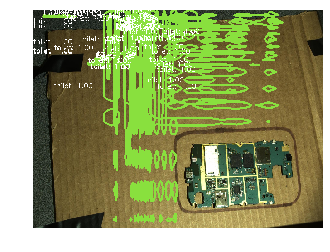

In [12]:
# compute predictions
predictions = my_dataset_demo.run_on_opencv_image(image, depth)
imshow(predictions)